# TO DO create a benchmark example

In [100]:
from sklearn.externals import joblib
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import random

random.seed(100)
import pandas as pd

In [10]:
train = joblib.load('training_data.pkl')
label = joblib.load('label_data.pkl')

In [11]:
c_vectorizer = joblib.load('vectorizers/count_vectorizer.pkl')

In [120]:
texts_count_vectorized = pd.DataFrame(c_vectorizer.fit_transform(train).toarray())
texts_count_vectorized.columns = c_vectorizer.get_feature_names()
df = pd.concat([texts_count_vectorized, label], axis=1)
df = df.sample(frac=1)

In [21]:
y = df['target_value'].values
X = df.iloc[:, :-1]

# Model evaluation

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import SCORERS
import matplotlib.pyplot as plt

In [25]:
clf = DecisionTreeClassifier(random_state=0)
dt_score_tf = cross_validate(clf, X, y, cv=10,return_train_score=True)
train_s = dt_score_tf['train_score']
test_s = dt_score_tf['test_score']

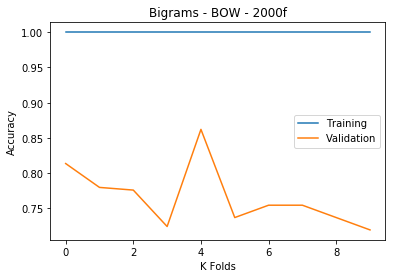

In [48]:
plt.plot(range(0,10),train_s,label='Training')
plt.plot(range(0,10),test_s,label='Validation')
plt.legend(loc=7)
plt.ylabel('Accuracy')
plt.xlabel('K Folds')
plt.title('Bigrams - BOW - 2000f')
plt.show()

In [41]:
# We are overfitting here!

In [124]:
c_vectorizer = CountVectorizer(max_features=8000) # bigrams
texts_count_vectorized = pd.DataFrame(c_vectorizer.fit_transform(train).toarray())
texts_count_vectorized.columns = c_vectorizer.get_feature_names()
df = pd.concat([texts_count_vectorized, label], axis=1)
df = df.sample(frac=1)
y = df['target_value'].values
X = df.iloc[:, :-1]

In [125]:
clf = DecisionTreeClassifier(random_state=0)
dt_score_tf = cross_validate(clf, X, y, cv=10,return_train_score=True)
train_s = dt_score_tf['train_score']
test_s = dt_score_tf['test_score']

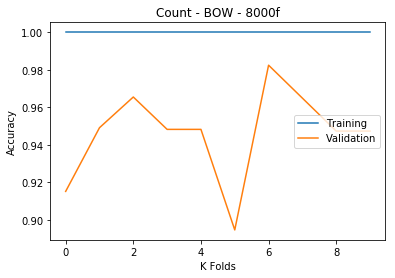

In [126]:
plt.plot(range(0,10),train_s,label='Training')
plt.plot(range(0,10),test_s,label='Validation')
plt.legend(loc=7)
plt.ylabel('Accuracy')
plt.xlabel('K Folds')
plt.title('Count - BOW - 8000f')
plt.show()

In [127]:
tfidf_vectorizer = TfidfVectorizer(max_features=8000,ngram_range=(1, 3))
tfidf_text_vectorized = pd.DataFrame(tfidf_vectorizer.fit_transform(train).toarray())
tfidf_text_vectorized.columns = tfidf_vectorizer.get_feature_names()
df = pd.concat([tfidf_text_vectorized, label], axis=1)
df = df.sample(frac=1)
y = df['target_value'].values
X = df.iloc[:, :-1]

In [128]:
clf = DecisionTreeClassifier(random_state=0)
dt_score_tf = cross_validate(clf, X, y, cv=10,return_train_score=True)
train_s = dt_score_tf['train_score']
test_s = dt_score_tf['test_score']

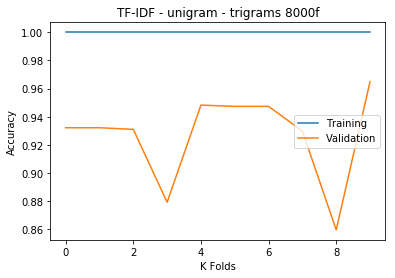

In [129]:
plt.plot(range(0,10),train_s,label='Training')
plt.plot(range(0,10),test_s,label='Validation')
plt.legend(loc=7)
plt.ylabel('Accuracy')
plt.xlabel('K Folds')
plt.title('TF-IDF - unigram - trigrams 8000f')
plt.show()

In [160]:
# combining both
c_vectorizer = CountVectorizer(max_features=8,ngram_range=(1, 3)) # bigrams
texts_count_vectorized = pd.DataFrame(c_vectorizer.fit_transform(train).toarray())
texts_count_vectorized.columns = c_vectorizer.get_feature_names()

tfidf_vectorizer = TfidfVectorizer(max_features=8,ngram_range=(1, 3))
tfidf_text_vectorized = pd.DataFrame(tfidf_vectorizer.fit_transform(train).toarray())
tfidf_text_vectorized.columns = tfidf_vectorizer.get_feature_names()

In [161]:
df = pd.concat([texts_count_vectorized,tfidf_text_vectorized, label], axis=1)
df = df.sample(frac=1)
y = df['target_value'].values
X = df.iloc[:, :-1]

In [162]:
clf = DecisionTreeClassifier(random_state=0)
dt_score_tf = cross_validate(clf, X, y, cv=10,return_train_score=True)
train_s = dt_score_tf['train_score']
test_s = dt_score_tf['test_score']

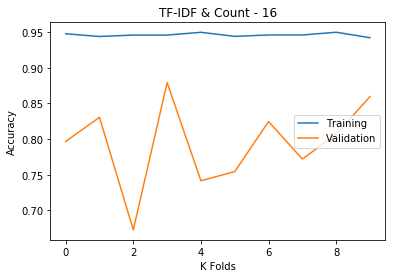

In [163]:
plt.plot(range(0,10),train_s,label='Training')
plt.plot(range(0,10),test_s,label='Validation')
plt.legend(loc=7)
plt.ylabel('Accuracy')
plt.xlabel('K Folds')
plt.title('TF-IDF & Count - 16')
plt.show()

In [168]:
import nltk
from nltk.collocations import *
nltk.download('genesis')

[nltk_data] Downloading package genesis to
[nltk_data]     /Users/justincharbonneau/nltk_data...
[nltk_data]   Unzipping corpora/genesis.zip.


True

In [166]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()

In [189]:
finder = BigramCollocationFinder.from_words(austen)

In [191]:
finder.apply_freq_filter(3)
finder.nbest(bigram_measures.pmi, 10)

[('behold', 'monarch'),
 ('caro', 'sposo'),
 ('mermaid', 'shark'),
 ('spruce', 'beer'),
 ('barouche', 'landau'),
 ('friday', 'saturday'),
 ('eating', 'drinking'),
 ('lord', 'earth'),
 ('sweep', 'gate'),
 ('brunswick', 'square')]

In [188]:
text_0 = nltk.corpus.gutenberg.raw('austen-emma.txt')

from lib.Functions import *
austen = stem_lem_words(tokenize(text_0))
